In [2]:
import os
print(os.path.exists("../data/raw.xlsx"))


True


In [2]:
"""this part for reading the excel file and cleaning the data
    1. read the excel file
    2. remove the empty rows
    3. print the number of rows before and after cleaning
    4. show the first few rows of the cleaned data
"""
import pandas as pd

columns_to_read = [
    "ردیف", "سال", "تاریخ حواله", "سال تولد", "نسبت",
    "كد پرسنلی", "شرکت", "نام طرح", "تاریخ بیماری",
    "تاریخ اعلام خسارت", "گروه بیماری", "نوع بیماری",
    "نوع تحویل مدارك", "هزینه پاراكلینیكی اعلام شده",
    "هزینه پاراکلینیکی پرداخت شده", "درصد پرداخت",
    "هزینه پاراكلینیكی اعلام شده2", "هزینه پاراکلینیکی پرداخت شده3"
]


bime = pd.read_excel(R"G:\tehran data\excell o amar\jalase1.xlsx", usecols=columns_to_read)
print(bime.__len__())

bime_clean = bime.dropna()
print(bime_clean.__len__())
bic=bime_clean
bic.head()


230879
195716


,ردیف,سال,تاریخ حواله,سال تولد,نسبت,كد پرسنلی,شرکت,نام طرح,تاریخ بیماری,تاریخ اعلام خسارت,گروه بیماری,نوع بیماری,نوع تحویل مدارك,هزینه پاراكلینیكی اعلام شده,هزینه پاراکلینیکی پرداخت شده,درصد پرداخت,هزینه پاراكلینیكی اعلام شده2,هزینه پاراکلینیکی پرداخت شده3
0,1,401-402,1401/09/10,1363,1,461415.0,شرکتی,4,1401/09/05,1401/09/06,ویزیت و دارو,هزینه دارو,از بیمه شده,148596,30196,0.203209,148596,30196
1,2,401-402,1401/09/10,1363,1,461415.0,شرکتی,4,1401/09/05,1401/09/06,ویزیت و دارو,هزینه ویزیت,از بیمه شده,900000,810000,0.900000,900000,810000
2,3,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,هزینه اعمال مجاز سرپائی,سایر اعمال مجاز سرپایی,از بیمه گذار,7000000,7000000,1.000000,7000000,7000000
3,4,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,پاراکلینیکی (گروه اول),انواع آندوسکوپی و کولونوسکوپی,از بیمه گذار,17800000,12752000,0.716404,17800000,12752000
4,5,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,ویزیت و دارو,هزینه ویزیت,از بیمه گذار,317000,317000,1.000000,317000,317000


In [3]:
bic.drop_duplicates(inplace=True)
bic = bic[(bic["سال تولد"] >= 1300) & (bic["سال تولد"] <= 1404)]
len(bic)


C:\Users\acer\AppData\Local\Temp\ipykernel_25544\1526282503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bic.drop_duplicates(inplace=True)


195704

In [4]:
"""new name for the columns and reorder the columns"""

columns = {
    "ردیف": "id",
    "سال": "year",
    "تاریخ حواله": "date",
    "سال تولد": "birth_year",
    "نسبت": "relation",
    "كد پرسنلی": "employee_code",
    "شرکت": "company",
    "نام طرح": "plan_name",
    "تاریخ بیماری": "disease_date",
    "تاریخ اعلام خسارت": "damage_date",
    "گروه بیماری": "disease_group",
    "نوع بیماری": "disease_type",
    "نوع تحویل مدارك": "document_type",
    "هزینه پاراكلینیكی اعلام شده": "announced_cost",
    "هزینه پاراکلینیکی پرداخت شده": "paid_cost",
    "درصد پرداخت": "payment_percentage",
    "هزینه پاراكلینیكی اعلام شده2": "announced_cost2",
    "هزینه پاراکلینیکی پرداخت شده3": "paid_cost3"
}
bic= bic.rename(columns=columns)
bic = bic[
    ["id", "year", "date", "birth_year", "relation", "employee_code", "company",
     "plan_name", "disease_date", "damage_date", "disease_group", "disease_type",
     "document_type", "announced_cost", "paid_cost", "payment_percentage",
     "announced_cost2", "paid_cost3"]
]
bic.head()


,id,year,date,birth_year,relation,employee_code,company,plan_name,disease_date,damage_date,disease_group,disease_type,document_type,announced_cost,paid_cost,payment_percentage,announced_cost2,paid_cost3
0,1,401-402,1401/09/10,1363,1,461415.0,شرکتی,4,1401/09/05,1401/09/06,ویزیت و دارو,هزینه دارو,از بیمه شده,148596,30196,0.203209,148596,30196
1,2,401-402,1401/09/10,1363,1,461415.0,شرکتی,4,1401/09/05,1401/09/06,ویزیت و دارو,هزینه ویزیت,از بیمه شده,900000,810000,0.900000,900000,810000
2,3,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,هزینه اعمال مجاز سرپائی,سایر اعمال مجاز سرپایی,از بیمه گذار,7000000,7000000,1.000000,7000000,7000000
3,4,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,پاراکلینیکی (گروه اول),انواع آندوسکوپی و کولونوسکوپی,از بیمه گذار,17800000,12752000,0.716404,17800000,12752000
4,5,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,ویزیت و دارو,هزینه ویزیت,از بیمه گذار,317000,317000,1.000000,317000,317000


In [5]:

translation_dict = {
    'ویزیت و دارو': 'Visit and Medication',
    'هزینه اعمال مجاز سرپائی': 'Outpatient Minor Procedure Costs',
    'پاراکلینیکی (گروه اول)': 'Paraclinical (Group 1)',
    'سایر پاراکلینیکی': 'Other Paraclinical',
    'هزینه  مربوط به خرید عینک طبی یا لنز تماسی طبی': 'Costs Related to Purchasing Prescription Eyeglasses or Contact Lenses',
    'پاراکلینیکی (گروه دوم)': 'Paraclinical (Group 2)',
    'خدمات دندانپزشکی': 'Dental Services',
    'اوروتز': 'Orthotics'
}

bic['disease_group'] = bic['disease_group'].astype(str).str.strip().apply(lambda x: translation_dict.get(x, x))


print(bic['disease_group'].unique())
bic.head()

['Visit and Medication' 'Outpatient Minor Procedure Costs'
 'Paraclinical (Group 1)' 'Other Paraclinical'
 'Costs Related to Purchasing Prescription Eyeglasses or Contact Lenses'
 'Paraclinical (Group 2)' 'Dental Services' 'Orthotics']


,id,year,date,birth_year,relation,employee_code,company,plan_name,disease_date,damage_date,disease_group,disease_type,document_type,announced_cost,paid_cost,payment_percentage,announced_cost2,paid_cost3
0,1,401-402,1401/09/10,1363,1,461415.0,شرکتی,4,1401/09/05,1401/09/06,Visit and Medication,هزینه دارو,از بیمه شده,148596,30196,0.203209,148596,30196
1,2,401-402,1401/09/10,1363,1,461415.0,شرکتی,4,1401/09/05,1401/09/06,Visit and Medication,هزینه ویزیت,از بیمه شده,900000,810000,0.900000,900000,810000
2,3,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,Outpatient Minor Procedure Costs,سایر اعمال مجاز سرپایی,از بیمه گذار,7000000,7000000,1.000000,7000000,7000000
3,4,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,Paraclinical (Group 1),انواع آندوسکوپی و کولونوسکوپی,از بیمه گذار,17800000,12752000,0.716404,17800000,12752000
4,5,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,Visit and Medication,هزینه ویزیت,از بیمه گذار,317000,317000,1.000000,317000,317000


In [6]:
new_document_dict = {"از بیمه شده": "From Insured",
                     "از بیمه گذار": "From Insurer",
                    "از مرکز درمانی معرفی شده با معرفینامه یا دفترچه":"From Treatment Center with Referral or Insurance Booklet"
                    }

bic["document_type"] = bic["document_type"].astype(str).str.strip().apply(lambda x: new_document_dict.get(x, x))
print(bic["document_type"].unique())
bic.head()

['From Insured' 'From Insurer'
 'From Treatment Center with Referral or Insurance Booklet']


,id,year,date,birth_year,relation,employee_code,company,plan_name,disease_date,damage_date,disease_group,disease_type,document_type,announced_cost,paid_cost,payment_percentage,announced_cost2,paid_cost3
0,1,401-402,1401/09/10,1363,1,461415.0,شرکتی,4,1401/09/05,1401/09/06,Visit and Medication,هزینه دارو,From Insured,148596,30196,0.203209,148596,30196
1,2,401-402,1401/09/10,1363,1,461415.0,شرکتی,4,1401/09/05,1401/09/06,Visit and Medication,هزینه ویزیت,From Insured,900000,810000,0.900000,900000,810000
2,3,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,Outpatient Minor Procedure Costs,سایر اعمال مجاز سرپایی,From Insurer,7000000,7000000,1.000000,7000000,7000000
3,4,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,Paraclinical (Group 1),انواع آندوسکوپی و کولونوسکوپی,From Insurer,17800000,12752000,0.716404,17800000,12752000
4,5,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,Visit and Medication,هزینه ویزیت,From Insurer,317000,317000,1.000000,317000,317000


In [7]:
new_company_dict = {
    'شرکتی': 'Company-based',
    'پیمانکار خدمات': 'Service Contractor',
    'پیکر': 'Peykar (Internal Workforce)',
    'پیمانکار تعمیرات': 'Maintenance Contractor',
    'ماهان': 'Mahan (Internal Project)',
    'پیمانکار نقلیه': 'Transport Contractor',
    'پیمانکار خدماتی': 'General Service Contractor'
}
bic["company"] = bic["company"].astype(str).str.strip().apply(lambda x: new_company_dict.get(x, x))


print(bic["company"].unique())


['Company-based' 'Service Contractor' 'Peykar (Internal Workforce)'
 'Maintenance Contractor' 'Mahan (Internal Project)'
 'Transport Contractor' 'General Service Contractor']


In [8]:
medical_service_dict = {
    'هزینه دارو': 'Medication Costs',
    'هزینه ویزیت': 'Visit Costs',
    'سایر اعمال مجاز سرپایی': 'Other Outpatient Minor Procedures',
    'انواع آندوسکوپی و کولونوسکوپی': 'Various Endoscopy and Colonoscopy',
    'تزریقات': 'Injections',
    'انواع الکتروکاردیوگرافی ( نوار قلب )': 'Various Electrocardiography (ECG)',
    'انواع آزمایش تشخیص پزشکی': 'Various Diagnostic Medical Tests',
    'سونوگرافی': 'Ultrasound',
    'عینک طبی': 'Prescription Glasses',
    'کار درمانی (OT)': 'Occupational Therapy (OT)',
    'انواع رادیوگرافی': 'Various Radiography',
    'ام آر آی (MRI)': 'MRI',
    'انواع اکو کاردیوگرافی': 'Various Echocardiography',
    'لیزر درمانی': 'Laser Therapy',
    'الکترومیلوگرافی(EMG) وهدایت عصبی (NCV)': 'EMG and Nerve Conduction (NCV)',
    'خدمات تشخیصی و پرتو پزشکی چشم': 'Ophthalmic Diagnostic and Radiologic Services',
    'انواع اسکن': 'Various Scans',
    'ترمیم': 'Dental Restoration',
    'معالجه ریشه دندان': 'Root Canal Treatment',
    'پریو': 'Periodontal Treatment',
    'پروتز': 'Prosthetics',
    'الکتروانسفالوگرافی (نوار مغز ) EEG': 'EEG (Electroencephalography)',
    'ایمپلنت': 'Implant',
    'پزشکی هسته ای (شامل اسکن هسته ای و درمان رادیوایزوتوپ)': 'Nuclear Medicine (Including Scans and Isotope Therapy)',
    'شنوایی سنجی (انواع ادیومتری)': 'Hearing Tests (Various Audiometry)',
    'تست ورزش': 'Stress Test',
    'انواع هولترمانیتورینگ': 'Various Holter Monitoring',
    'نوار و سوزن تست قند خون': 'Blood Glucose Test Strips and Lancets',
    'مشاوره روانشناسی': 'Psychology Counseling',
    'فیزیوتراپی (PT)': 'Physical Therapy (PT)',
    'ختنه': 'Circumcision',
    'جراحی فک و صورت': 'Oral and Maxillofacial Surgery',
    'بخیه': 'Sutures',
    'دندانپزشکی اطفال': 'Pediatric Dentistry',
    'گچ گیری': 'Casting',
    'حجامت': 'Cupping Therapy',
    'خدمات تشخیصی یورودینامیک (نوار مثانه)': 'Urodynamic Diagnostic Services (Bladder Test)',
    'تست های آلرژیک': 'Allergy Tests',
    'خدمات تشخیصی تنفسی شامل اسپیرومتری وPFT': 'Respiratory Diagnostics Including Spirometry and PFT',
    'دانسیتومتری (سنجش تراکم استخوان)': 'Bone Densitometry',
    'بیماریهای دهان و دندان': 'Oral and Dental Diseases',
    'خدمات اورژانس در موارد غیر بستری': 'Emergency Services (Non-Hospitalized)',
    'کرایوتراپی': 'Cryotherapy',
    'گفتار درمانی (ST)': 'Speech Therapy (ST)',
    'تخلیه کیست': 'Cyst Drainage',
    'سرم درمانی': 'IV Therapy',
    'سمعک': 'Hearing Aid',
    'دندانپزشکی': 'Dentistry',
    'آنژیو گرافی عروق محیطی': 'Peripheral Angiography',
    'ماموگرافی': 'Mammography',
    'پانسمان': 'Wound Dressing',
    'تزریقات داخل مفاصل': 'Intra-articular Injections',
    'آنژیوگرافی چشم': 'Ocular Angiography',
    'بیوپسی': 'Biopsy',
    'تست UBT': 'UBT (Urea Breath Test)',
    'شکستگی و در رفتگی': 'Fractures and Dislocations',
    'تست خواب': 'Sleep Study',
    'طب سوزنی': 'Acupuncture',
    'ارتودنسی': 'Orthodontics',
    'آزمایش پاتولوژی (آسیب شناسی )': 'Pathology Test',
    'واکسن آنفولانزا': 'Influenza Vaccine',
    'لنز طبی': 'Prescription Contact Lenses',
    'آزمایشات ژنتیک جنین  شامل NIPT و آمینوسنتز': 'Prenatal Genetic Testing (NIPT, Amniocentesis)',
    'آنالیز پیس میکر': 'Pacemaker Analysis',
    'خدمات بستری دندانپزشکی': 'Inpatient Dental Services',
    'رفتار درمانی ( نوروفیدبک )': 'Behavioral Therapy (Neurofeedback)',
    'کفی طبی': 'Orthopedic Insole',
    'کفش طبی': 'Orthopedic Shoes',
    'کایروپراکتیک': 'Chiropractic',
    'کمربند طبی': 'Orthopedic Belt',
    'آزمایشات ژنتیک پزشکی': 'Medical Genetic Testing',
    'جوراب واریس': 'Compression Stockings',
    'زانو بند طبی': 'Knee Brace',
    'خدمات تشخیصی دندانپزشکی': 'Dental Diagnostic Services',
    'سایر خدمات تشخیصی چشم': 'Other Ophthalmic Diagnostic Services',
    'الکترومیوگرافی(EMG)': 'Electromyography (EMG)',
    'انواع آندوسکوپی': 'Various Endoscopies',
    'اسکن هسته ای': 'Nuclear Scan',
    'آزمایش مارکرهای جنینی': 'Fetal Marker Testing',
    'شکستگی سرپایی': 'Outpatient Fracture Care',
    'اپتومتری': 'Optometry',
    'پریمتری': 'Perimetry',
    'داروی خارجی (فاقد معادل ایرانی)': 'Foreign Medication (No Iranian Equivalent)',
    'جبران هزینه های مربوط به بند ناف': 'Cord Blood Cost Reimbursement',
    'بیومتری': 'Biometry',
    'هدایت عصبی (NCV)': 'Nerve Conduction Velocity (NCV)',
    'دستگاه فشار سنج': 'Blood Pressure Monitor',
    'خرید دستگاه اکسیژن ساز': 'Purchase of Oxygen Generator',
    'طب فیزیکی': 'Physical Medicine',
    'تیلت تست': 'Tilt Test',
    'درمان رادیوایزوتوپ': 'Radioisotope Therapy',
    'بیوفیدبک': 'Biofeedback',
    'تشک مواج': 'Anti-Bedsore Mattress',
    'PRP مفاصل': 'Joint PRP Therapy',
    'ویلچر': 'Wheelchair',
    'داروی خاص جهت بیماری های صعب العلاج': 'Special Drugs for Hard-to-Treat Diseases'
}
bic["disease_type"] = bic["disease_type"].astype(str).str.strip().apply(lambda x: medical_service_dict.get(x, x))

bic.head()

,id,year,date,birth_year,relation,employee_code,company,plan_name,disease_date,damage_date,disease_group,disease_type,document_type,announced_cost,paid_cost,payment_percentage,announced_cost2,paid_cost3
0,1,401-402,1401/09/10,1363,1,461415.0,Company-based,4,1401/09/05,1401/09/06,Visit and Medication,Medication Costs,From Insured,148596,30196,0.203209,148596,30196
1,2,401-402,1401/09/10,1363,1,461415.0,Company-based,4,1401/09/05,1401/09/06,Visit and Medication,Visit Costs,From Insured,900000,810000,0.900000,900000,810000
2,3,401-402,1401/09/13,1340,4,461421.0,Company-based,4,1401/09/03,1401/09/11,Outpatient Minor Procedure Costs,Other Outpatient Minor Procedures,From Insurer,7000000,7000000,1.000000,7000000,7000000
3,4,401-402,1401/09/13,1340,4,461421.0,Company-based,4,1401/09/03,1401/09/11,Paraclinical (Group 1),Various Endoscopy and Colonoscopy,From Insurer,17800000,12752000,0.716404,17800000,12752000
4,5,401-402,1401/09/13,1340,4,461421.0,Company-based,4,1401/09/03,1401/09/11,Visit and Medication,Visit Costs,From Insurer,317000,317000,1.000000,317000,317000


In [9]:
bic.info()
bic.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 195704 entries, 0 to 230878
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  195704 non-null  int64  
 1   year                195704 non-null  object 
 2   date                195704 non-null  object 
 3   birth_year          195704 non-null  int64  
 4   relation            195704 non-null  int64  
 5   employee_code       195704 non-null  float64
 6   company             195704 non-null  object 
 7   plan_name           195704 non-null  int64  
 8   disease_date        195704 non-null  object 
 9   damage_date         195704 non-null  object 
 10  disease_group       195704 non-null  object 
 11  disease_type        195704 non-null  object 
 12  document_type       195704 non-null  object 
 13  announced_cost      195704 non-null  int64  
 14  paid_cost           195704 non-null  int64  
 15  payment_percentage  195704 non-null  fl

,id,year,date,birth_year,relation,employee_code,company,plan_name,disease_date,damage_date,disease_group,disease_type,document_type,announced_cost,paid_cost,payment_percentage,announced_cost2,paid_cost3
count,195704.000000,195704,195704,195704.000000,195704.000000,1.957040e+05,195704,195704.000000,195704,195704,195704,195704,195704,1.957040e+05,1.957040e+05,195704.000000,1.957040e+05,1.957040e+05
unique,NaN,2,595,NaN,NaN,NaN,7,NaN,697,634,8,96,3,NaN,NaN,NaN,NaN,NaN
top,NaN,401-402,1402/01/30,NaN,NaN,NaN,Company-based,NaN,1401/12/15,1403/04/31,Visit and Medication,Visit Costs,From Insurer,NaN,NaN,NaN,NaN,NaN
freq,NaN,102170,2815,NaN,NaN,NaN,77556,NaN,667,1561,112913,60934,162048,NaN,NaN,NaN,NaN,NaN
mean,109958.013658,NaN,NaN,1367.383411,1.766949,2.204851e+06,NaN,3.477604,NaN,NaN,NaN,NaN,NaN,5.773659e+06,4.828919e+06,0.911786,5.779867e+06,4.835127e+06
std,69597.852879,NaN,NaN,18.664731,1.607421,7.299342e+07,NaN,0.714512,NaN,NaN,NaN,NaN,NaN,1.439384e+07,1.161862e+07,0.183995,1.439135e+07,1.161603e+07
min,1.000000,NaN,NaN,1306.000000,0.000000,8.270000e+02,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-7.850000e+07,-7.850000e+07,0.000449,2.000000e+04,2.000000e+04
25%,49377.750000,NaN,NaN,1359.000000,1.000000,3.603210e+05,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,8.926890e+05,7.926352e+05,0.912162,8.953112e+05,7.963162e+05
50%,98756.500000,NaN,NaN,1365.000000,1.000000,4.611100e+05,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,1.620000e+06,1.467000e+06,1.000000,1.621824e+06,1.470000e+06
75%,176543.250000,NaN,NaN,1377.000000,3.000000,4.617190e+05,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.248040e+06,3.950000e+06,1.000000,4.250000e+06,3.956012e+06


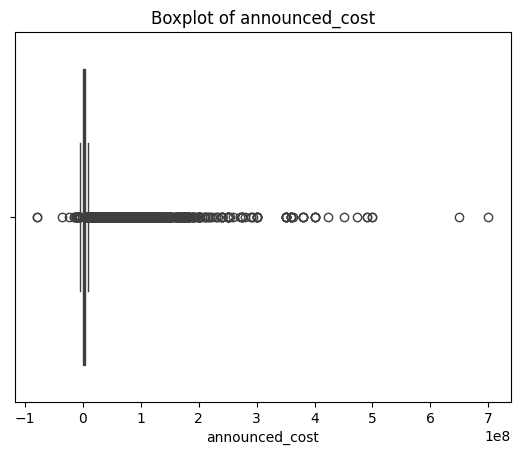

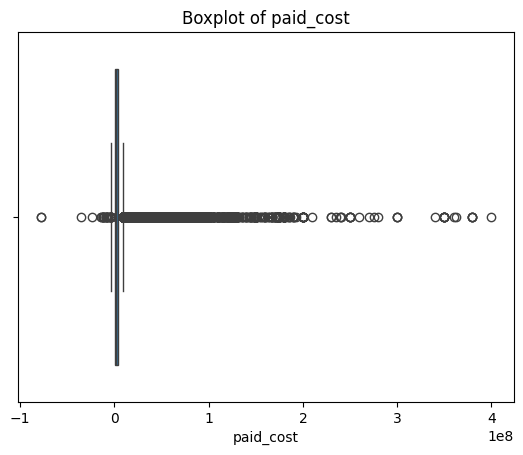

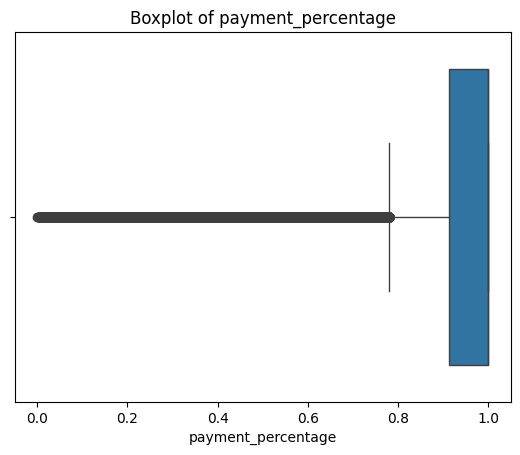

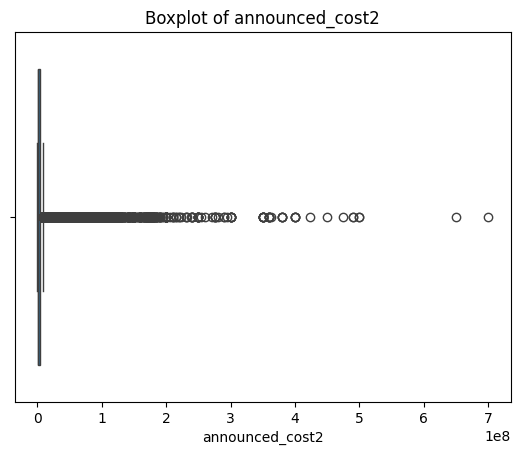

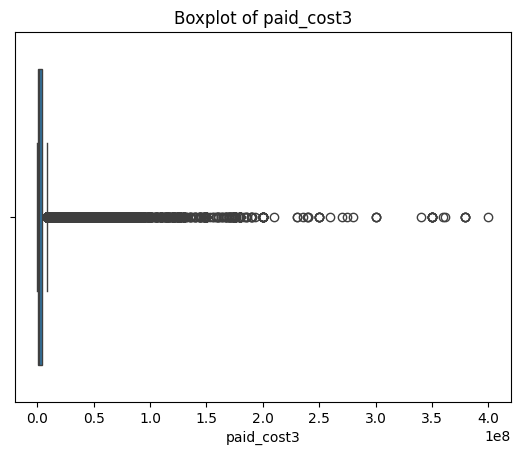

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
columns1 = [
    "announced_cost", "paid_cost", "payment_percentage",
    "announced_cost2", "paid_cost3"
]
for i in columns1:
    sns.boxplot(x=bic[i])
    plt.title(f"Boxplot of {i}")
    plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_25544\520736222.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=group_counts.values, y=group_counts.index, palette='viridis')


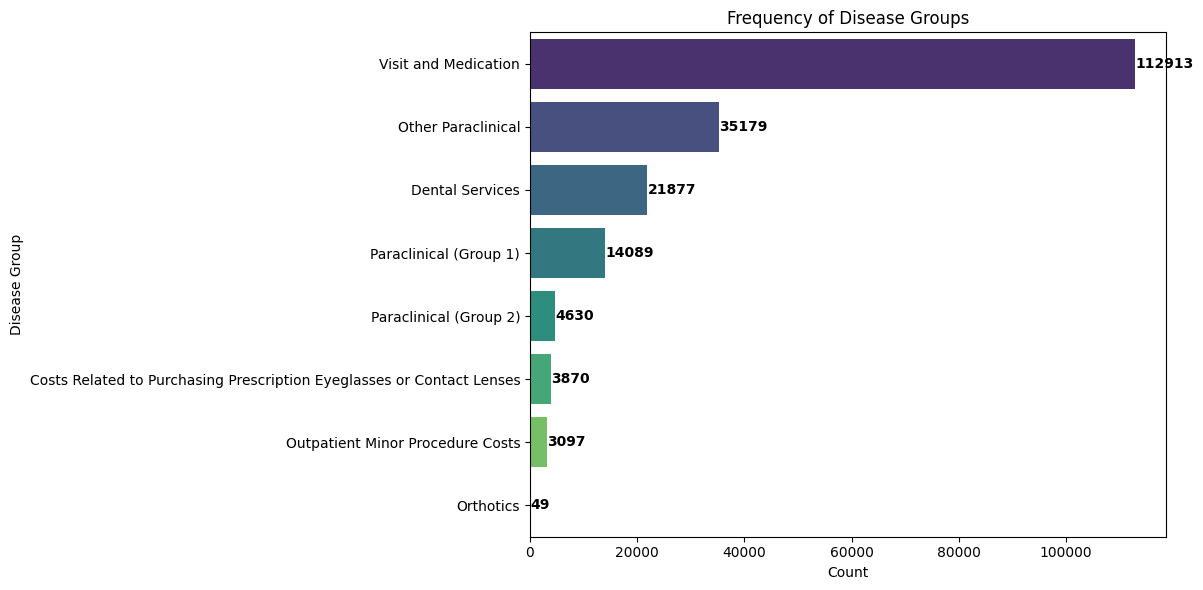

In [11]:
group_counts = bic['disease_group'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=group_counts.values, y=group_counts.index, palette='viridis')

for i, v in enumerate(group_counts.values):
    ax.text(v + 50, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Frequency of Disease Groups')
plt.xlabel('Count')
plt.ylabel('Disease Group')
plt.tight_layout()
plt.show()

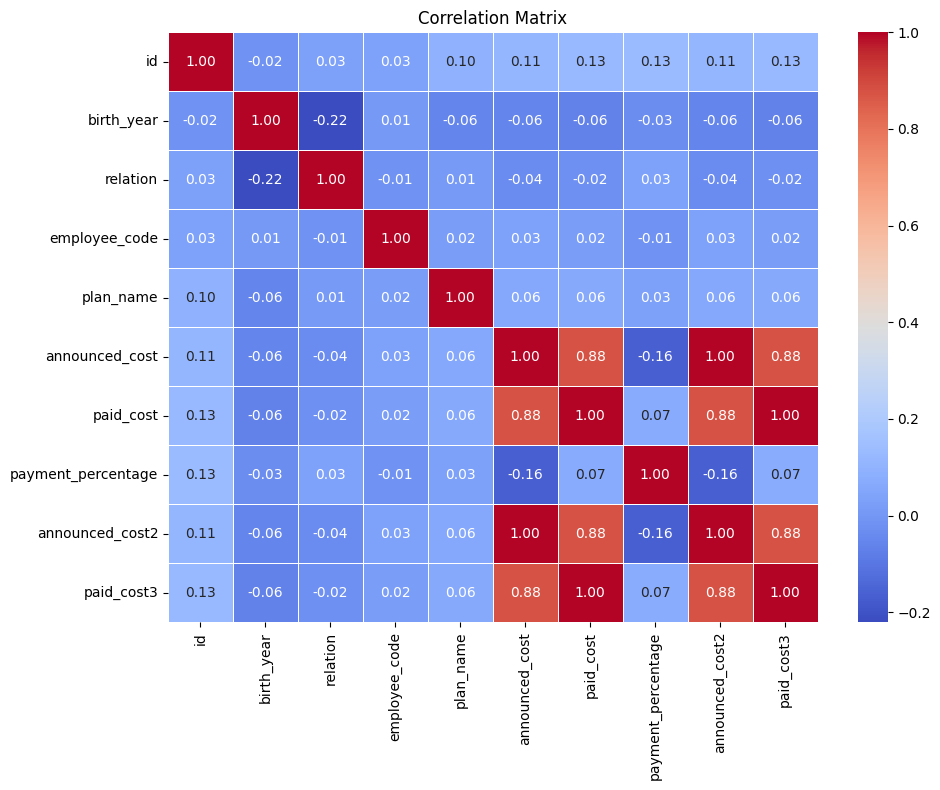

In [12]:

correlation_matrix = bic.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [13]:
bic= bic.drop(columns=['announced_cost', 'paid_cost'])


In [14]:
def find_iqr_outliers_bic(columns):
    outliers_dict = {}

    for col in columns:
        Q1 = bic[col].quantile(0.25)
        Q3 = bic[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = bic[(bic[col] < lower_bound) | (bic[col] > upper_bound)]
        outliers_dict[col] = {
            'count': len(outliers),
            'indices': outliers.index.tolist(),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

    return outliers_dict

outliers = find_iqr_outliers_bic(['announced_cost2', 'paid_cost3'])

for col, info in outliers.items():
    print(f"\nColumn: {col}")
    print(f"Outlier Count: {info['count']}")
    print(f"Lower Bound: {info['lower_bound']}")
    print(f"Upper Bound: {info['upper_bound']}")
    print(f"Indices (first 10): {info['indices'][:20]}")



Column: announced_cost2
Outlier Count: 27757
Lower Bound: -4136721.875
Upper Bound: 9282033.125
Indices (first 10): [3, 17, 66, 67, 73, 116, 136, 139, 140, 142, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]

Column: paid_cost3
Outlier Count: 26565
Lower Bound: -3943228.125
Upper Bound: 8695556.875
Indices (first 10): [3, 17, 66, 67, 73, 116, 117, 126, 136, 139, 140, 142, 145, 146, 147, 148, 149, 150, 151, 152]


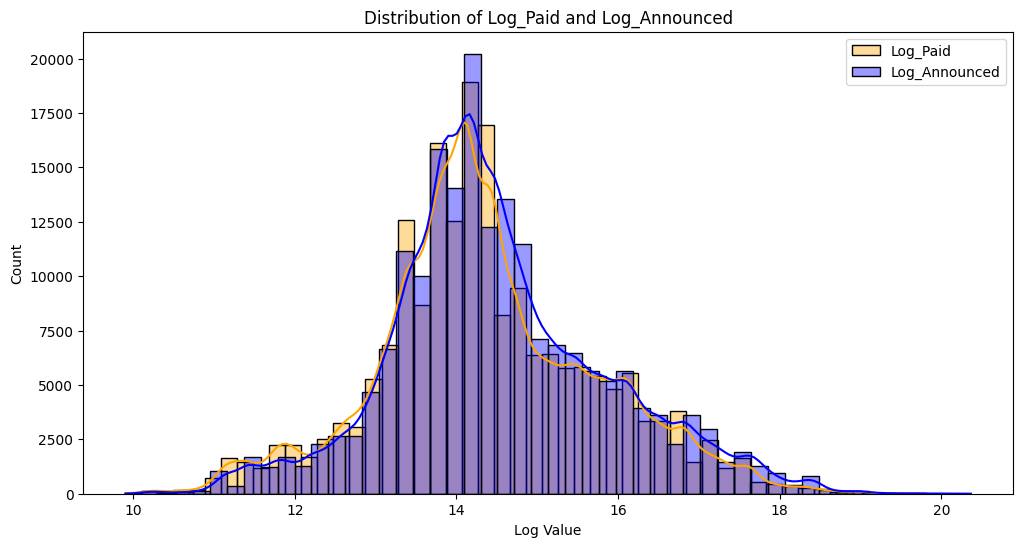

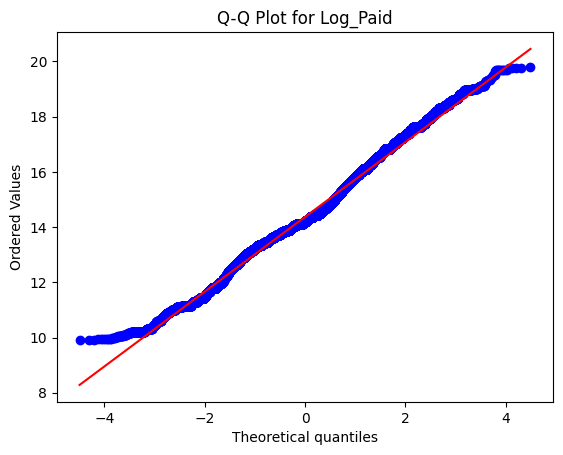

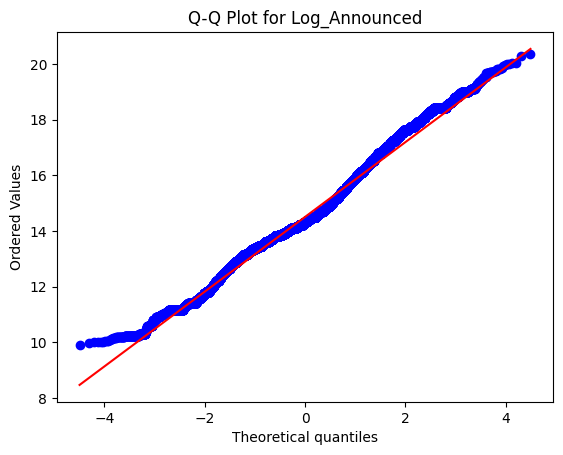

In [15]:
import numpy as np
import scipy.stats as stats
bic['Log_Paid'] = np.log(bic['paid_cost3'] + 1)
bic['Log_Announced'] = np.log(bic['announced_cost2'] + 1)

plt.figure(figsize=(12, 6))
sns.histplot(bic['Log_Paid'], color='orange', label='Log_Paid', kde=True, bins=50, stat='count', alpha=0.4)
sns.histplot(bic['Log_Announced'], color='blue', label='Log_Announced', kde=True, bins=50, stat='count', alpha=0.4)
plt.title('Distribution of Log_Paid and Log_Announced')
plt.xlabel('Log Value')
plt.ylabel('Count')
plt.legend()
plt.show()

stats.probplot(bic['Log_Paid'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Log_Paid")
plt.show()

stats.probplot(bic['Log_Announced'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Log_Announced")
plt.show()

In [16]:
print(bic['Log_Paid'].skew(), bic['Log_Paid'].kurtosis())
print(bic['Log_Announced'].skew(), bic['Log_Announced'].kurtosis())
bic.head()

0.22648336449015577 0.3226701521254096
0.3729948693689887 0.4331411321469969


,id,year,date,birth_year,relation,employee_code,company,plan_name,disease_date,damage_date,disease_group,disease_type,document_type,payment_percentage,announced_cost2,paid_cost3,Log_Paid,Log_Announced
0,1,401-402,1401/09/10,1363,1,461415.0,Company-based,4,1401/09/05,1401/09/06,Visit and Medication,Medication Costs,From Insured,0.203209,148596,30196,10.315498,11.908993
1,2,401-402,1401/09/10,1363,1,461415.0,Company-based,4,1401/09/05,1401/09/06,Visit and Medication,Visit Costs,From Insured,0.900000,900000,810000,13.604791,13.710151
2,3,401-402,1401/09/13,1340,4,461421.0,Company-based,4,1401/09/03,1401/09/11,Outpatient Minor Procedure Costs,Other Outpatient Minor Procedures,From Insurer,1.000000,7000000,7000000,15.761421,15.761421
3,4,401-402,1401/09/13,1340,4,461421.0,Company-based,4,1401/09/03,1401/09/11,Paraclinical (Group 1),Various Endoscopy and Colonoscopy,From Insurer,0.716404,17800000,12752000,16.361199,16.694709
4,5,401-402,1401/09/13,1340,4,461421.0,Company-based,4,1401/09/03,1401/09/11,Visit and Medication,Visit Costs,From Insurer,1.000000,317000,317000,12.666660,12.666660


In [17]:


bic['Z_paid_cost3'] = stats.zscore(bic['paid_cost3'].dropna())
bic['Z_announced_cost2'] = stats.zscore(bic['announced_cost2'].dropna())

bic['Z_Log_Paid'] = stats.zscore(bic['Log_Paid'].dropna())
bic['Z_Log_Announced'] =stats. zscore(bic['Log_Announced'].dropna())

print(bic[['Z_paid_cost3', 'Z_announced_cost2', 'Z_Log_Paid', 'Z_Log_Announced']].head(10))


   Z_paid_cost3  Z_announced_cost2  Z_Log_Paid  Z_Log_Announced
0     -0.413648          -0.391297   -2.971719        -1.912117
1     -0.346516          -0.339084   -0.560214        -0.585323
2      0.186370           0.084783    1.020893         0.925711
3      0.681549           0.835235    1.460613         1.613203
4     -0.388957          -0.379595   -1.247993        -1.353994
5     -0.384136          -0.375704   -1.128729        -1.234161
6     -0.366144          -0.361181   -0.802562        -0.906439
7     -0.389560          -0.380081   -1.264363        -1.370443
8     -0.385118          -0.376496   -1.151485        -1.257026
9      0.298344           0.175163    1.145841         1.051255


In [18]:
bic_clean = bic[
    (bic['Z_Log_Paid'].abs() <= 3) &
    (bic['Z_Log_Announced'].abs() <= 3)
].copy()

bic_clean.drop(columns=['Z_Log_Announced','Z_Log_Paid'], inplace=True)

print("Original shape:", bic.shape)
print("After removing outliers:", bic_clean.shape)
bic_clean=bic
columns_to_drop = ['Z_paid_cost3', 'Z_announced_cost2', 'Log_Paid', 'Log_Announced',"announced_cost2", "paid_cost3","payment_percentage"]
bic_clean.drop(columns=columns_to_drop, inplace=True, errors='ignore')
bic.head()


Original shape: (195704, 22)
After removing outliers: (195025, 20)


,id,year,date,birth_year,relation,employee_code,company,plan_name,disease_date,damage_date,disease_group,disease_type,document_type,Z_Log_Paid,Z_Log_Announced
0,1,401-402,1401/09/10,1363,1,461415.0,Company-based,4,1401/09/05,1401/09/06,Visit and Medication,Medication Costs,From Insured,-2.971719,-1.912117
1,2,401-402,1401/09/10,1363,1,461415.0,Company-based,4,1401/09/05,1401/09/06,Visit and Medication,Visit Costs,From Insured,-0.560214,-0.585323
2,3,401-402,1401/09/13,1340,4,461421.0,Company-based,4,1401/09/03,1401/09/11,Outpatient Minor Procedure Costs,Other Outpatient Minor Procedures,From Insurer,1.020893,0.925711
3,4,401-402,1401/09/13,1340,4,461421.0,Company-based,4,1401/09/03,1401/09/11,Paraclinical (Group 1),Various Endoscopy and Colonoscopy,From Insurer,1.460613,1.613203
4,5,401-402,1401/09/13,1340,4,461421.0,Company-based,4,1401/09/03,1401/09/11,Visit and Medication,Visit Costs,From Insurer,-1.247993,-1.353994


In [19]:
bic_test = bic_clean.dropna(subset=["Z_Log_Paid","Z_Log_Announced"])

f_company, p_company = stats.f_oneway(*[
    bic_test[bic_test['company'] == val]['Z_Log_Paid']
    for val in bic_test['company'].unique()
])

f_doc, p_doc = stats.f_oneway(*[
    bic_test[bic_test['document_type'] == val]['Z_Log_Paid']
    for val in bic_test['document_type'].unique()
])

print(f"ANOVA p-value for company: {p_company}")
print(f"ANOVA p-value for document_type: {p_doc}")



ANOVA p-value for company: 0.0
ANOVA p-value for document_type: 0.0


In [20]:
"""for better result i choose one hot encoding"""
print(bic["document_type"].unique())





['From Insured' 'From Insurer'
 'From Treatment Center with Referral or Insurance Booklet']


In [21]:

bic_encoded = pd.get_dummies(bic, columns=["relation","document_type","company","disease_group"], drop_first=False)

target_mean = bic.groupby('disease_type')['Z_Log_Paid'].mean()


bic_encoded['disease_type_target'] = bic['disease_type'].map(target_mean)

In [22]:
bic = bic_encoded.copy()
bic["age"]= 1404 - bic["birth_year"]
bic['age_std'] = (bic['age'] - bic['age'].mean()) / bic['age'].std()
bic.drop(columns=["age"], inplace=True, errors='ignore')
bic["plan_std"]=(bic["plan_name"] - bic["plan_name"].mean()) / bic["plan_name"].std()
bic.head()



,id,year,date,birth_year,employee_code,plan_name,disease_date,damage_date,disease_type,Z_Log_Paid,...,disease_group_Dental Services,disease_group_Orthotics,disease_group_Other Paraclinical,disease_group_Outpatient Minor Procedure Costs,disease_group_Paraclinical (Group 1),disease_group_Paraclinical (Group 2),disease_group_Visit and Medication,disease_type_target,age_std,plan_std
0,1,401-402,1401/09/10,1363,461415.0,4,1401/09/05,1401/09/06,Medication Costs,-2.971719,...,False,False,False,False,False,False,True,-0.315308,0.234850,0.731123
1,2,401-402,1401/09/10,1363,461415.0,4,1401/09/05,1401/09/06,Visit Costs,-0.560214,...,False,False,False,False,False,False,True,-0.437879,0.234850,0.731123
2,3,401-402,1401/09/13,1340,461421.0,4,1401/09/03,1401/09/11,Other Outpatient Minor Procedures,1.020893,...,False,False,False,True,False,False,False,0.319891,1.467121,0.731123
3,4,401-402,1401/09/13,1340,461421.0,4,1401/09/03,1401/09/11,Various Endoscopy and Colonoscopy,1.460613,...,False,False,False,False,True,False,False,1.393914,1.467121,0.731123
4,5,401-402,1401/09/13,1340,461421.0,4,1401/09/03,1401/09/11,Visit Costs,-1.247993,...,False,False,False,False,False,False,True,-0.437879,1.467121,0.731123


In [ ]:
bic.to_excel( R"../data/cleaned.xlsx", index=False)
bic

,id,year,date,birth_year,employee_code,plan_name,disease_date,damage_date,disease_type,Z_Log_Paid,...,disease_group_Dental Services,disease_group_Orthotics,disease_group_Other Paraclinical,disease_group_Outpatient Minor Procedure Costs,disease_group_Paraclinical (Group 1),disease_group_Paraclinical (Group 2),disease_group_Visit and Medication,disease_type_target,age_std,plan_std
0,1,401-402,1401/09/10,1363,461415.0,4,1401/09/05,1401/09/06,Medication Costs,-2.971719,...,False,False,False,False,False,False,True,-0.315308,0.234850,0.731123
1,2,401-402,1401/09/10,1363,461415.0,4,1401/09/05,1401/09/06,Visit Costs,-0.560214,...,False,False,False,False,False,False,True,-0.437879,0.234850,0.731123
2,3,401-402,1401/09/13,1340,461421.0,4,1401/09/03,1401/09/11,Other Outpatient Minor Procedures,1.020893,...,False,False,False,True,False,False,False,0.319891,1.467121,0.731123
3,4,401-402,1401/09/13,1340,461421.0,4,1401/09/03,1401/09/11,Various Endoscopy and Colonoscopy,1.460613,...,False,False,False,False,True,False,False,1.393914,1.467121,0.731123
4,5,401-402,1401/09/13,1340,461421.0,4,1401/09/03,1401/09/11,Visit Costs,-1.247993,...,False,False,False,False,False,False,True,-0.437879,1.467121,0.731123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230874,230981,402-403,1403/08/07,1356,360059.0,4,1403/07/21,1403/08/06,Biofeedback,1.118790,...,False,False,True,False,False,False,False,1.107734,0.609889,0.731123
230875,230982,402-403,1403/08/07,1356,360059.0,4,1403/07/17,1403/08/06,Biofeedback,1.118790,...,False,False,True,False,False,False,False,1.107734,0.609889,0.731123
230876,230983,402-403,1403/08/24,1389,360043.0,4,1403/06/07,1403/08/20,Biofeedback,2.355152,...,False,False,True,False,False,False,False,1.107734,-1.158152,0.731123
230877,230984,402-403,1403/08/30,1360,360413.0,4,1403/06/07,1403/08/27,Radioisotope Therapy,1.989000,...,False,False,False,False,True,False,False,1.973666,0.395581,0.731123
